___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Yahoo finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
pip install pandas-datareader

     |████████████████████████████████| 112kB 4.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [6]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2021, 8, 16)

In [11]:
# Bank of America:
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C",'yahoo',start,end)

# Goldman Sachs
GS = data.DataReader("GS",'yahoo',start,end)

# JPMorgan Chase
JPM = data.DataReader("JPM",'yahoo',start,end)

# Morgan Stanley
MS = data.DataReader("MS",'yahoo',start,end)

# Wells Fargo
WFC = data.DataReader("WFC",'yahoo',start,end)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.523809
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.285755
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.263241
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.382265
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.379047
...,...,...,...,...,...,...
2021-08-10,49.689999,48.689999,48.730000,49.630001,28708100.0,49.630001
2021-08-11,50.730000,49.169998,49.630001,50.660000,29203900.0,50.660000
2021-08-12,51.250000,50.560001,50.759998,51.150002,21729900.0,51.150002


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [16]:
tickers=['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [20]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [24]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.280807  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.916729  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.960411  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.909451  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.931290  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.364140  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.389069  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.488869  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.526283  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.912933  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.523809  
2006-01-04   31.799999  31.530001  10870000.0  20.285755  
2006-01-05   31.500000  31.495001  10158000.0  20.263241  
2006-01-06   31.580000  31.680000   8403800.0  20.382265  
2006-01-09   31.674999  31.674999   5619600.0  20.379047  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [25]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [26]:
bank_stocks.head(10)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
2006-01-10   46.509998  45.880001  46.400002  46.209999  15634600.0   
2006-01-11   46.250000  45.750000  46.060001  46.099998  14742100.0   
2006-01-12   46.230000  45.709999  46.220001  45.799999  10546600.0   
2006-01-13   46.000000  45.680000  45.830002  45.799999  10791000.0   
2006-01-17   45.580002  45.000000  45.400002  45.310001  14605900.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.280807  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.916729  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.960411  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.909451  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.931290  487.399994  483.000000  486.000000  483.899994  ...   
2006-01-10   33.647324  485.500000  480.799988  483.000000  485.399994  ...   
2006-01-11   33.567226  495.799988  485.799988  495.799988  489.799988  ...   
2006-01-12   33.348785  491.000000  488.799988  491.000000  490.299988  ...   
2006-01-13   33.348785  491.899994  487.299988  491.000000  489.200012  ...   
2006-01-17   32.991993  487.000000  482.700012  485.100006  484.299988  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.364140  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.389069  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.488869  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.526283  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.912933  31.825001  31.555000   
2006-01-10   58.849998  59.220001  4713600.0  36.931637  31.684999  31.445000   
2006-01-11   59.150002  59.570000  5837900.0  37.320087  31.895000  31.575001   
2006-01-12   59.630001  59.470001  3817700.0  37.257431  31.790001  31.430000   
2006-01-13   59.570000  59.380001  3430900.0  37.201046  31.795000  31.510000   
2006-01-17   59.450001  58.810001  2624700.0  36.843933  31.575001  31.200001   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.523809  
2006-01-04   31.799999  31.530001  10870000.0  20.285755  
2006-01-05   31.500000  31.495001  10158000.0  20.263241  
2006-01-06   31.580000  31.680000   8403800.0  20.382265  
2006-01-09   31.674999  31.674999   5619600.0  20.379047  
2006-01-10   31.549999  31.650000   7157800.0  20.362963  
2006-01-11   31.650000  31.815001   8047000.0  20.469114  
2006-01-12   31.705000  31.445000  10763600.0  20.231075  
2006-01-13   31.549999  31.625000   6365600.0  20.346880  
2006-01-17   31.459999  31.299999  10690400.0  20.137779  

[10 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [36]:
bank_stocks['BAC']['Close'].max()

54.900001525878906

In [37]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 415.0
JPM 166.44000244140625
MS 104.66999816894531
WFC 65.93000030517578


In [38]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     415.000000
JPM    166.440002
MS     104.669998
WFC     65.930000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [39]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [57]:
for tick in tickers:
    returns [tick +' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [59]:
import seaborn as sns

/Users/pratiknarendrapawar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


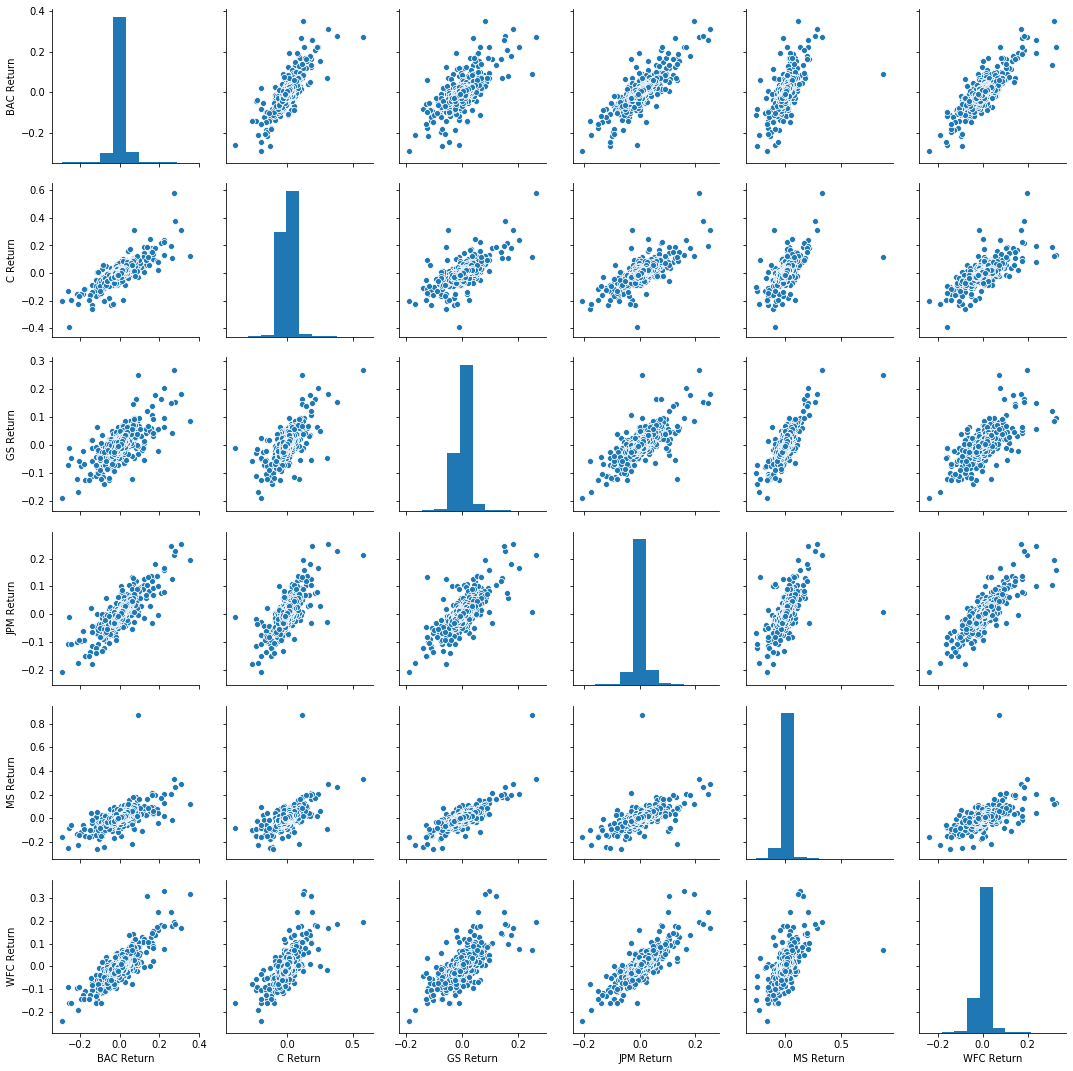

In [60]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [66]:
returns.idxmin()               # pandas operation to find minimum of that day.

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [68]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [69]:
returns.std()

BAC Return    0.032016
C Return      0.033896
GS Return     0.023491
JPM Return    0.024829
MS Return     0.032884
WFC Return    0.027319
dtype: float64

In [72]:
returns.loc['2015-01-01':'2015-12-31'].std()             #wfc has lowest risk

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

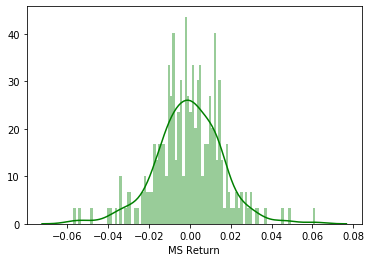

In [75]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

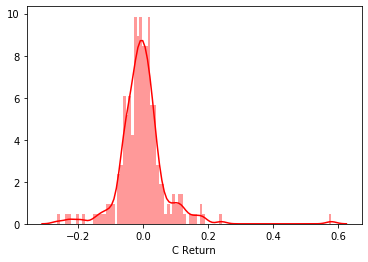

In [79]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [82]:
pip install plotly


     |████████████████████████████████| 21.8MB 2.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install cufflinks

     |████████████████████████████████| 81kB 4.1MB/s eta 0:00:011


  Created wheel for cufflinks: filename=cufflinks-0.17.3-cp37-none-any.whl size=67921 sha256=92aca5c3decce40e0d1fb0b48fd437a6cebff8458838c6265a52233a517bd93b
  Stored in directory: /Users/pratiknarendrapawar/Library/Caches/pip/wheels/7d/ba/8d/38b672c3e40d8bd22dd60b8e6e29965b43f2b4be4d064e44d5
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

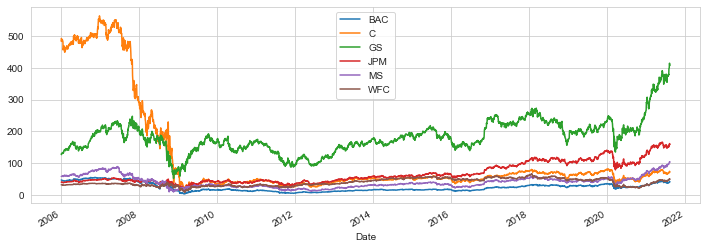

In [85]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

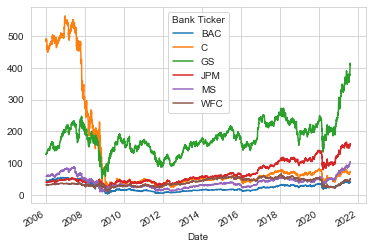

In [87]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [88]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

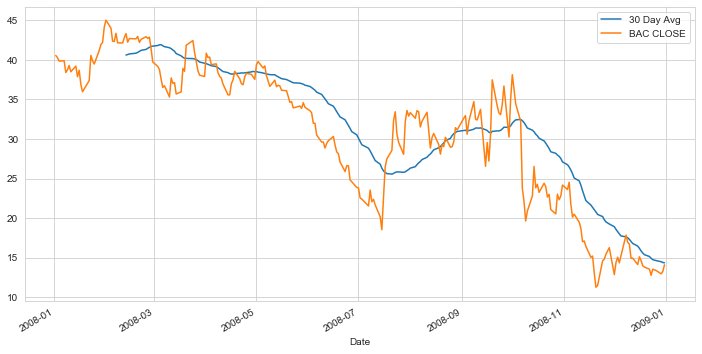

In [91]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

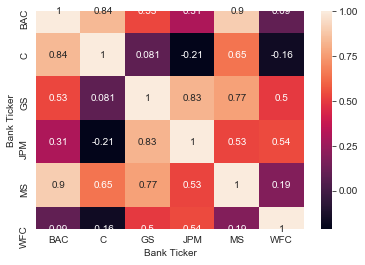

In [94]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

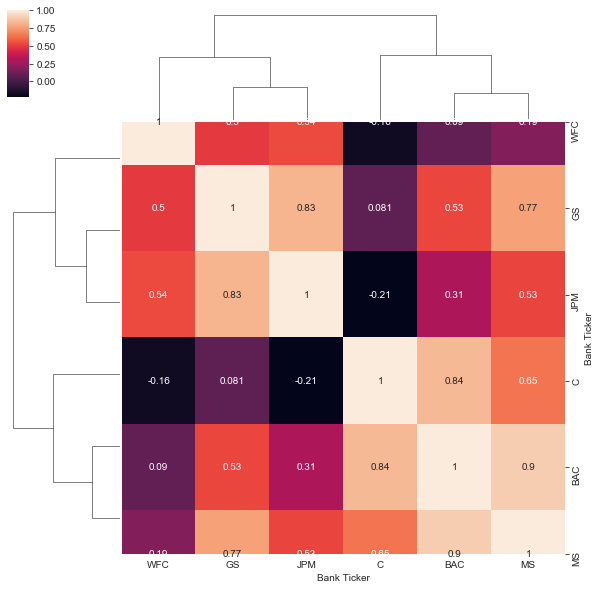

In [95]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [98]:
close_corr=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [101]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [97]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [103]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [104]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')